# Analisando a correlação entre variáveis quantitativas

**Correlação**

A ideia de correlação está sempre atrelada a duas ou mais variáveis quantitativas. Às vezes, em um conjunto de dados, é interessante tentar encontrar como duas variáveis quantitativas se relacionam entre si. Daí entra a correlação, que é a nada mais que é a relação entre essas variáveis, sendo causal ou não.

Correlação não é uma regra, é uma tendência entre duas ou mais variáveis, mas que não resulta na certeza de que todo valor de uma variável é dependente da outra, de maneira exclusiva

**Correlação não implica em causalidade!** Isso significa que apesar de duas variáveis serem fortemente correlacionadas, elas podem não ser a causa única um do outro, sendo necessário analisar o contexto para verificar as outras possíveis variáveis que estão envolvidas no processo

### Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid') # Definindo um tema para os graficos

### Importar um dataset

In [4]:
# Importando um dataset de gorjetas
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Verificando relação entre gorjeta e valor de conta usando um gráfico de dispersão

**Gráfico de dispersão ou Scatterplot**

Esse gráfico representa os dados como pontos em um plano cartesiano, mapeando uma das variáveis na posição do eixo das abscissas, enquanto a outra variável é mapeada na posição do eixo das ordenadas.

Perceba que o gráfico é bastante simples de analisar e encontrar padrões.

**Para criar um gráfico de dispersão utilizamos o método `.scatterplot()` da biblioteca `seaborn`**
- Podemos passar os dados de duas formas distintas, no caso, usamos os dados da dataset "tips"
    - *sns.scatterplot(x='total_bill', y='tip', data=df)*
    - *sns.scatterplot(x=df['total_bill'], y = df['tip'])*

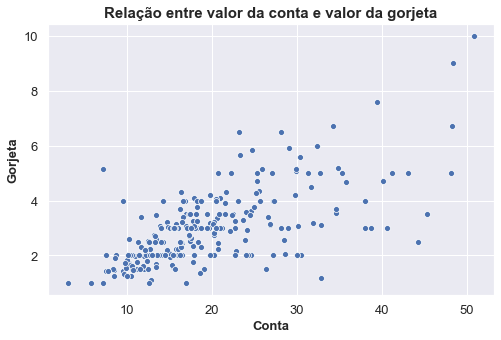

In [40]:
# Gerando gráfico entre gorjetas e valor da conta

plt.figure(figsize=(8,5)) # Definindo o tamanho (8,5) polegadas

# Definindo a função para gerar a visualização
# sns.scatterplot(x='total_bill', y='tip', data=df) Duas formas de definir o scatterplot
sns.scatterplot(x=df['total_bill'], y = df['tip'])

# Caracterizando o gráfico
plt.title('Relação entre valor da conta e valor da gorjeta', fontsize=15, fontweight='bold')
plt.xlabel('Conta', fontsize=13, fontweight='bold')
plt.ylabel('Gorjeta', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) # Aumentando o tamanho das etiquetas dos eixos

plt.show() # Mostrando a visualização gerada

**Análise**

Observamos no gráfico que há tendência de crescimento entre as variáveis. Notasse que enquanto o valor da conta cresce o valor de gorjeta também aumenta, mas isso não ocorre em todos os casos, ou seja, não é uma regra e por esse motivo há um correlação, uma tendência estatística entre as variáveis analisadas.

# Como analisar gráficos de dispersão

<img src="correlacao.jpg">

Na imagem acima podemos observar formas de observar correlações em gráficos de dispersão.

**Atributos de um gráfico de dispersão:**
- **Analisando a relação linear das variáveis:**
    - Quando o comportamento dos dados se aproxima muito de uma reta, temos uma correlação mais linear, ou seja, alta
    - Quando os dados estão mais dispersos no gráfico e não podem se aproximar muito do comportamento de uma reta, temos uma correlação baixa
- **Analisar a relação de tendência de crescimento das variaveis entre si:**
    - Se enquanto uma variável cresce a outra também cresce, temos uma correlação positiva
    - Se enquanto uma variável cresca, a outra decresce, temos uma correlação negativa

**Obs: Quando os dados estão tão dispersos que não é possível observar tendência ou linearidade entre as variáveis, *não há uma correlação entre elas***

---
**Analisando correlação por valor real**

Outra forma de analisar a correlação entre os gráficos é através do **valor real da correlação que existe no intervalo de -1 a 1**.

**Valor Real da correlação**
    - Magnitude [0,1]
        - A magnitude do número define o quão linear é o comportamento dos dados.
        - Quanto mais próximo de zero, mais baixa é a correlação
        - Quanto mais próxima de 1, mais alta é a correlação
    - Posição do valor de correlação na reta real
        - Para analisar a posição, analisamos o sinal do valor afim de identificar se a correlação é positiva ou negativa
        - Se for um sinal negativo, significa que a correlação é negativa
        - Se for um sinal positivo, significa que a correlação é positiva
        
**OBS: Se a o valor real da correlação for 0, então *não há correlação entre os dados***

### Gráfico de dispersão com reta de regressão

O `regplot()`permite com que criamos um gráfico de dispersão com um reta de regressão que tenta modelar o comportamento dos dados.

Os argumentos utilizado em `regplot()` é idêntico ao visto no uso do `scatterplot()`.

**Usar um gráfico de dispersão com a reta de regressão permite uma melhor percepção da correlação positiva entre as variáveis, isso porque a reta de regressão busca modelar o comportamento dos dados com o menor erro possível entre ela e os dados, assim, a reta quase sempre passa no meio dos dados, o que nos permite ver o quão dispersos os dados e o quanto de resistência há para os dados manterem o comportamento inicialmente analisado**

**Observe qua há uma sombra em torno da reta, essa sombra representa um intervalo de confiança de 95% por padrão. Isso pode ser alterado modificando o atributo `ci`, variando o valor 1 a 0**

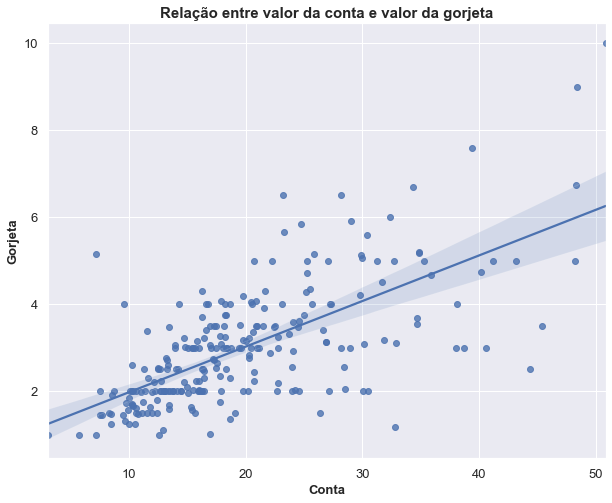

In [43]:
plt.figure(figsize=(10,8))
sns.regplot(x='total_bill', y='tip', data=df)
plt.title('Relação entre valor da conta e valor da gorjeta', fontsize=15, fontweight='bold')
plt.xlabel('Conta', fontsize=13, fontweight='bold')
plt.ylabel('Gorjeta', fontsize=13, fontweight='bold')
plt.tick_params(labelsize=13) 
plt.show()

## Gráfico de dispersão para mais de duas variáveis

Podemos querer analisar mais de duas variável quantitativa por vez, sejam quantitativas ou qualitatitivas, para isso, podemos mapear os dados não só através da posição, mais também através da cor ou tamanho da forma, ou até pela forma da representação dos dados

**Mapeando pela cor**

Para mapear pela cor inserimos o atributo `hue`, que significa matiz, no **scatterplot**, e em seguida atribuimos a ela a feature que queremos mapear

Observe que com duas cores de contrastes atrativos podemos analisar perfeitamente a relação entre a variável categórica e as duas quantitativas

**Não há atributo `hue` no regplot**

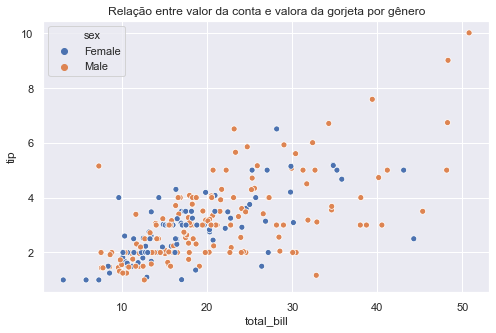

In [44]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta e valora da gorjeta por gênero')
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.show()

**Análise**

Notamos que no geral, homens e mulheres tem maior tendência a dar uma gorjeta maior conforme o valor da conta aumenta.

Podemos notar que homens tem tendência a ter contas mais altas e gorjetas mais altas, enquanto as mulheres, dão gorjetas mais medianas e fazem contas de valor mais mediano, mas de maneira proporcional ao observado como comportamento padrão do conjunto de dados

**Quando há muitas variáveis categoricas essa abordagem se torna confusa, pois a quantidade de cores exige um maior esforço da percepção para detectar padrões**

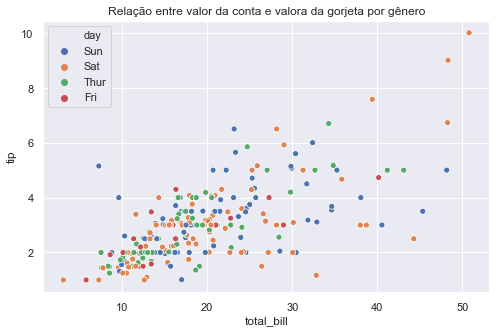

In [25]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta e valora da gorjeta por gênero')
sns.scatterplot(x='total_bill', y='tip', hue='day', data=df)
plt.show()

**Para contornar essa situação, podemos plotar multiplos gráficos de dispersão, um para cada variável categórica, nesse caso, o dia. Fazemos isso usando o método `relplot()`.**

Essa função é derivada da classe `FacetGrid`, que permite criar grades de visualizações. Para separar o gráfico em grades, basta inserir e alterar o valor do atributo `col`, atribuindo-o valor da feature que se deseja analisar.

**OBS: Não é possível usar funções como `pln.xlabel`, `plt.title` para modificar características visuais dos gráficos de relplot porque o FaceGrid possui as suas próprias configurações**

**O relplot também aceita o parâmetro `hue`**

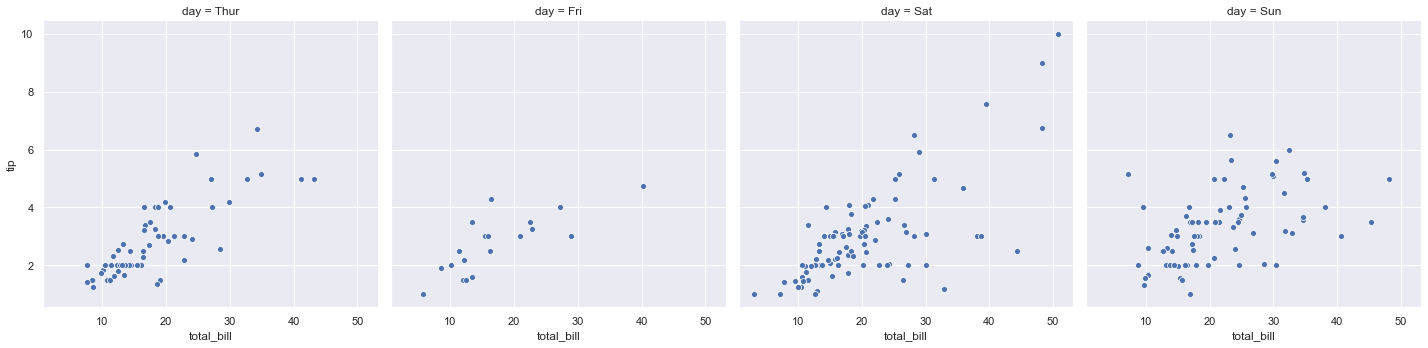

In [48]:
sns.relplot(x='total_bill', y='tip', col='day', data=df)
plt.show()

O observamos que há uma correlação mais forte no sábado do que no domingo e nos outros dias da semana

**Podemos analisar além dos dias, o sexo**

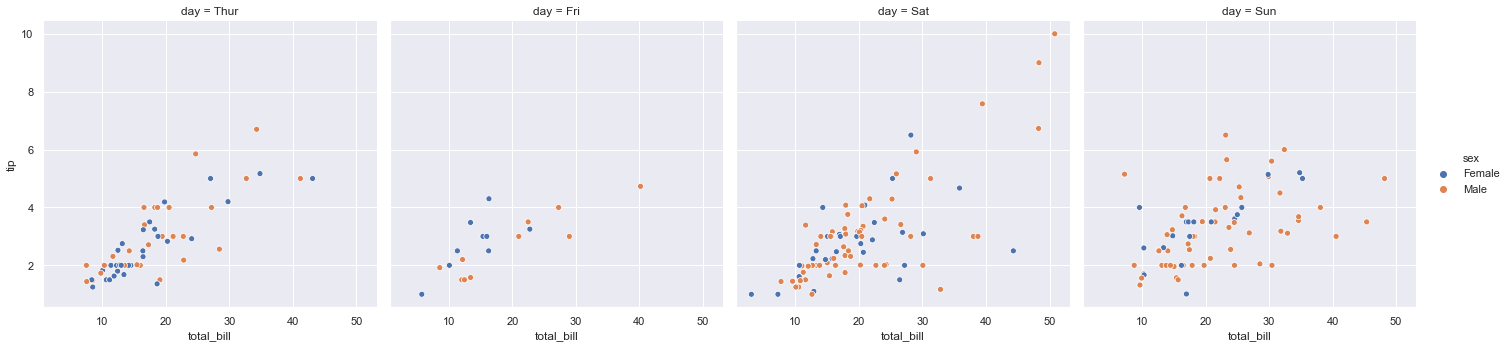

In [51]:
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=df)
plt.show()

Observamos que nos finais de semana há sempre uma predominancia masculina no restaurante, e esses são os dias de maiores gorjetas e contas. Já nos dias úteis, há um maior equilíbrio da presença de ambos os sexos, mas a quantidade de pessoas é bem menor e o valor da conta e gorjeta sãom bem mais modestos do que o apresentado no final de semana

### lmplot e gráfico de dispersão com reta de regressão

Existe um outro gráfico de dispersão que se baseia no `replot` mas que é derivado do `relplot` e que permite usar o parâmetro `hue`. Esse método, que também deriva da classe **FaceGrid** é o `lmplot`.

O **lmplot** permite gerar multiplas observações do *gráfico de dispersão com reta de regressão* ao modificar o valor de `col` e também permite fazer observações com a reta de regressão pela matiz de cor ao utilizar o parâmetro `hue`, que não é permitido no método `relplot`

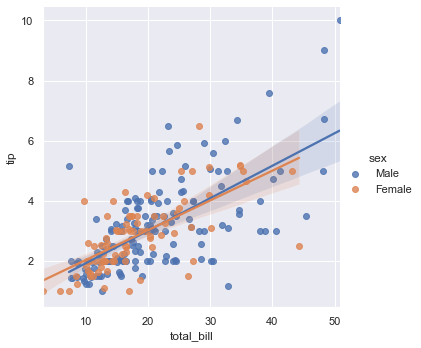

In [52]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=df)
plt.show()

Com duas retas, cada uma traçando o comportamento dos dados atribuidos a cada sexo, podemos comparar o comportamento deles de uma forma mais direta.

No geral, a reta permite analisar de forma mais objetiva a tendência entre as variáveis e, analisando a dispersão em torno da reta, o quão linear está essa distribuição.

Aqui, a tendência entre o sexo é a mesma.

Lembrando que quanto maior é a inclinação, maior é o crescimento da variável do eixo y em relação a variável do eixo x, no caso, o valor da gorjeta cresceria mais rápido que o valor da conta se a inclinação fosse muito aguda

**Modemos observar vários gráficos em grade, quando adicionamos o atributo `col`**

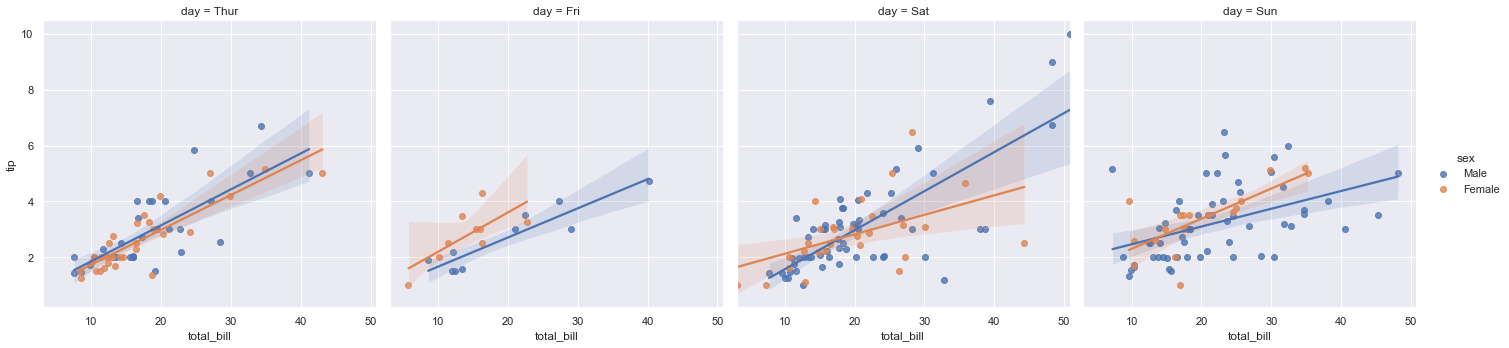

In [39]:
sns.lmplot(x='total_bill', y='tip', col='day', hue='sex', data=df)
plt.show()

Notamos que o comportamento geral dos dados, tanto pro sexo masculino quanto feminino, é de tendência de crescimento positiva. Entretanto, a taxa de crescimento não é constante entre os dias da semana entre os sexos e nem em um mesmo sexo.

- Quinta Feira
    - A taxa de crescimento entre os sexos é basicamente a mesma, mas devido a reta que representa o comportamento masculino está um pouco mais acima do feminino, podemos dizer que o valor de gorjeta dado pelos homens é um pouco maior.
- Sexta Feira
    - A taxa de crescimento para o sexo feminino é um pouco maior, o que implica dizer que a gorjeta dada pelas mulheres cresce muito mais rápido em função do crescimento da conta, do que a gorjeta dada pelo sexo masculino.
    - As mulheres tendem a gastar menos com a conta, o que é observado pelo tamanho da reta, que se extende mais para o sexa masculino
    - E um outro detalhe é que a gorjeta das mulheres é no geral maior, já que a reta é superior a reta que representa o comportamento dos dados do sexo masculino

- Sábado
    - A taxa de crescimento é maior para o sexo masculino
    - As mulheres começam com gorjetas maior, mas conforme a conta aumenta a gorjeta dos homens superam
- Domingo
    - Oposto do que ocorre no sábado

**Podemos analisar, ao invés do sexo masculino ou feminino, o tamanho das mesas do restaurante**

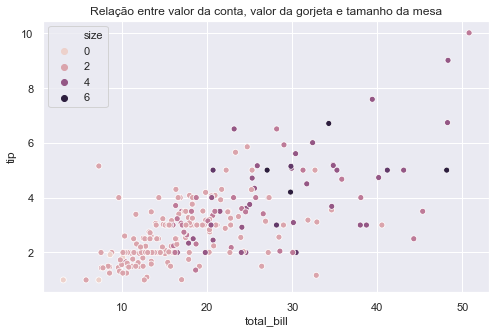

In [55]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta, valor da gorjeta e tamanho da mesa')
sns.scatterplot(x="total_bill", y="tip", hue = 'size', data=df)
plt.show()

**Observe que como a variável `size` é quantitativa, os dados mapeados pela cor varia de intensidade conforme o valor da variável vai aumentando, indo de uma cor mais clara para uma mais escura**

Notamos que é há uma correlação positiva entre o tamanho da mesa, valor da conta e valor da gorjeta, pois os pontos mais claros tendem a ter menores contas e gorjetas, e os pontos mais escuros, maiores contas e gorjetas

**OBS:** É um tanto difícil fazer comparações diretas quando duas ou mais variáveis são mapeadas em canais visuais diferentes: posição e cor

---

### Gráfico de bolha como variação do scatterplot

**Podemos usar ainda no scatterplot, o atributo `size` para mapear uma variável, de preferência quantitativa, em relação ao tamanho do marcador. Nesse caso, os pontos variam o seu tamanho, se assemelhando a bolhas, o que define o nome do gráfico**


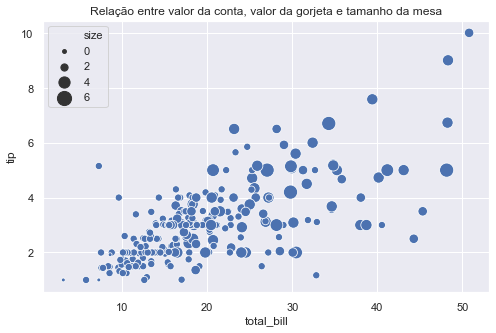

In [58]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta, valor da gorjeta e tamanho da mesa')
sns.scatterplot(x="total_bill", y="tip", size = 'size', sizes=(15, 200), data=df)
# O sizes=(15,200) define um intervalo de área na qual o tamanho das bolinhas podem ter
plt.show()

Esse gráfico sofre da mesma desvantagem do gráfico de dispersão anterior, se torna difícil fazer comparações entre variáveis quantitativas quando há mais de uma forma de ser mapeado: tamanho e posição.

Entretanto, como o tamanho é mais perceptível que a variação de intensidade de cor, esse gráfico pode ser mais confortável de ser analisado


**Quando usar um gráfico de dispersão baseado em cor e quando usar um gráfico de bolhas**

- Gráfico de bolhas
    - É melhor de ser utilizado quando há uma maior dispersão dos dados, sendo mais fácil notar o padrão através da variação de tamanho
    - No caso de os dados estarem muito juntos, se torna difícil perceber quando uma bolha termina e outra começa, sendo complicado analisar o gráfico
- Gráfico de dispersão baseado em cores
    - Quando os dados estão muito juntos é preferível usar as cores, pois permite uma percepção de diferenciação dos dados melhor.
    - Quando eles estão muito dispersos, enxergar várias cores se torna desnecessário e cansativo.

### Há outras forma de representar os dados

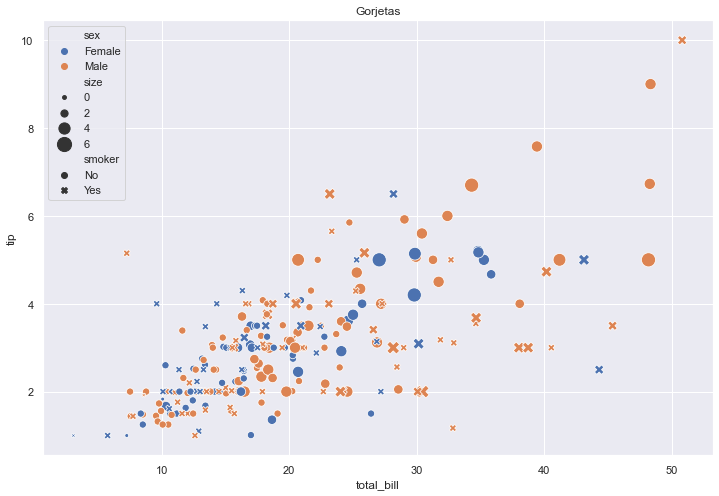

In [60]:
plt.figure(figsize=(12,8))
plt.title('Gorjetas')
sns.scatterplot(x="total_bill", y="tip", size = 'size', hue = 'sex', style = 'smoker', sizes=(15, 200), data=df)
plt.show()

**Usando o `style`, que recebe o valor de uma das colunas, no caso, fumante, a quantidade de valores diferentes nessa coluna define a quantidade de variações de formato de marcadores que o gráfico tera. Ou seja, agora, além das cores e tamanho dos marcadores, a forma deles também é um jeito de mapear os valores, no caso, categóricos**

**OBS:** Obviamente, com muitas informações na tela, se torna complicado analisar os dados, nem sempre sendo um meio muito útil